In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/CEE_DATA.csv")

In [3]:
df

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,'Excellent','male','General','NO','ONE','SEBA','AHSEC','ENGLISH','Excellent','Excellent','DOCTOR','OTHERS'
1,'Excellent','male','OBC','WA','TWO','SEBA','AHSEC','OTHERS','Excellent','Excellent','SCHOOL_TEACHER','HOUSE_WIFE'
2,'Excellent','male','OBC','OA','TWO','OTHERS','CBSE','ENGLISH','Excellent','Excellent','BUSINESS','HOUSE_WIFE'
3,'Excellent','male','General','WA','ONE','SEBA','AHSEC','OTHERS','Excellent','Excellent','SCHOOL_TEACHER','SCHOOL_TEACHER'
4,'Excellent','male','General','OA','TWO','SEBA','CBSE','ENGLISH','Excellent','Excellent','COLLEGE_TEACHER','HOUSE_WIFE'
...,...,...,...,...,...,...,...,...,...,...,...,...
661,'Average','female','ST','WA','ONE','SEBA','AHSEC','ENGLISH','Good','Vg','OTHERS','HOUSE_WIFE'
662,'Average','male','ST','WA','THREE','SEBA','AHSEC','ENGLISH','Vg','Good','CULTIVATOR','HOUSE_WIFE'
663,'Average','male','ST','WA','TWO','SEBA','CBSE','ENGLISH','Good','Vg','OTHERS','SCHOOL_TEACHER'
664,'Average','male','ST','WA','THREE','SEBA','AHSEC','ENGLISH','Good','Good','SCHOOL_TEACHER','HOUSE_WIFE'


In [4]:
X = df[['Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_ X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation']]
Y = df[['Performance']]

In [5]:
X = pd.get_dummies(X)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [7]:
print("Train Size Instances: ", X_train.shape[0])
print("Test Size Instances:", X_test.shape[0])

Train Size Instances:  466
Test Size Instances: 200


In [8]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [9]:
Y_pred = clf.predict(X_test)

In [10]:
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.525


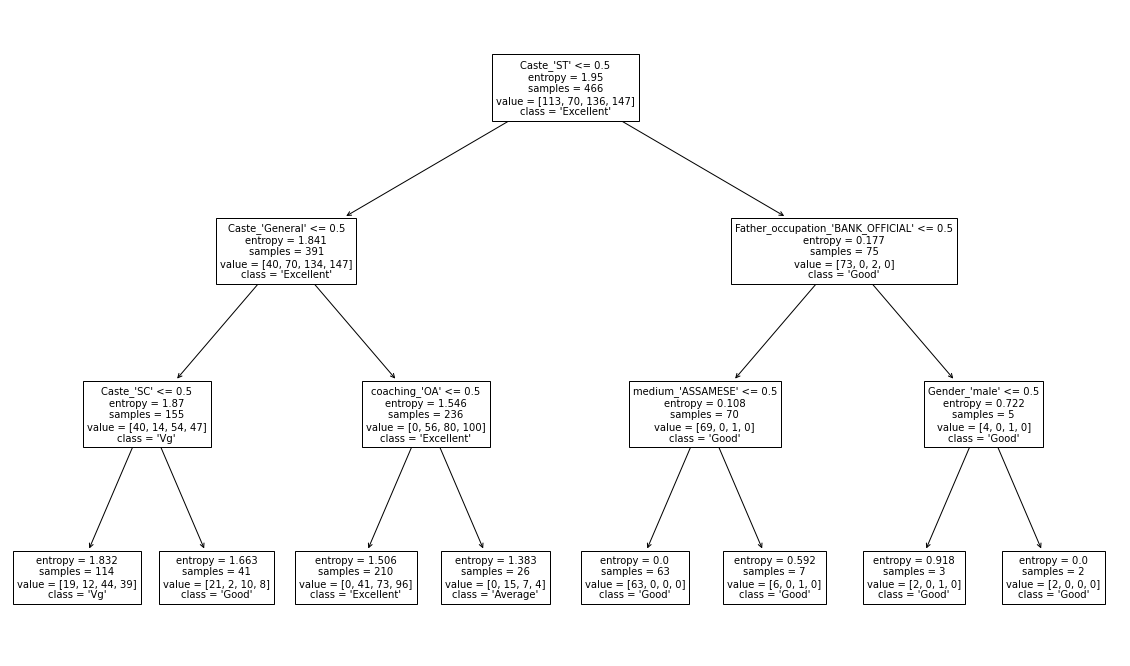

In [11]:
plt.figure(figsize=(20,12))
tree.plot_tree(clf, fontsize=10, feature_names=list(X.columns), class_names=list(set(Y.values.reshape(-1,))))
plt.show()